### **CC57 - MACHINE LEARNING - CLASIFICADOR SUPPORT VECTOR MACHINE (SVM)**

### **Actividad #4: Detección de infedilidad en un matrimonio**


Los datos provienen de statsmodels disponible en: https://www.statsmodels.org/stable/index.html

El conjunto de datos contiene informacion sobre las caracteriticas de la esposa en la relacion marital (edad, religion, numero de hijos, educacion, ocupacion,  cantidad de infidelidades, etc). Este conjunto de datos se puede tratar como un problema de clasificación creando una nueva variable binaria infiel (¿la esposa tuvo al menos una infidelidad?) e intentando predecir la clasificación para cada esposa.


El conjunnto de datos **infiel.csv** contempla 6366 observaciones en 9 variables.  Su estructura es la siguiente:

**- 1. rate_marriage:**woman's rating of her marriage (1 = very poor, 5 = very good)

**- 2. age:** woman's age

**- 3. yrs_married:**number of years married

**- 4. children:** number of children

**- 5. religious:** woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

**- 6. educ:** level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

**- 7. occupation:** woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

**- 8. occupation_husb:** husband's occupation (same coding as above)

**- 9. affairs:** time spent in extra-marital affairs

Se solicita lo siguiente:

- Cargar los datos
- Realizar un analisis visual y preprocesamiento de los datos
- Crear (3) modelos utilizando el **clasificador SVM** para predecir si una esposa es o no infiel dentro de la relacion marital.  

  -  **Modelo #1:** Clasificador SVM basico (sin parametros)
  -  **Modelo #2:** Clasificador SVM con hiperparametros
  -  **Modelo #3:** Clasificador SVM con hiperparametros | Data sintetica

- Visualizar los resultados por modelo
  -  Reporte de Clasificacion
  -  Matriz de Confusion
- Evaluar el modelo: explique sus conclusiones



## <font color=blue>0. Cargar Librerias</font>


In [2]:
import pandas as pd

## <font color=blue>1. Analisis Exploratorio de los Datos</font>


In [3]:
#Cargar archivo de datos
#data = pd.read_csv("infiel.csv")
data = pd.read_csv("infiel.csv")

In [4]:
#Visualizar primeros registros del conjunto de datos
data.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


In [5]:
# Datos originales
print(f"\n1. DATOS ORIGINALES:")
print(f"   Filas: {len(data)}")
print(f"   Columnas: {len(data.columns)}")
print(f"   Columnas: {list(data.columns)}")


1. DATOS ORIGINALES:
   Filas: 6366
   Columnas: 9
   Columnas: ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb', 'affairs']


In [8]:
# Estadísticas descriptivas
print(f"\n6. ESTADÍSTICAS DESCRIPTIVAS:")
print(data.describe())


6. ESTADÍSTICAS DESCRIPTIVAS:
       rate_marriage          age  yrs_married     children    religious  \
count    6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean        4.109645    29.082862     9.009425     1.396874     2.426170   
std         0.961430     6.847882     7.280120     1.433471     0.878369   
min         1.000000    17.500000     0.500000     0.000000     1.000000   
25%         4.000000    22.000000     2.500000     0.000000     2.000000   
50%         4.000000    27.000000     6.000000     1.000000     2.000000   
75%         5.000000    32.000000    16.500000     2.000000     3.000000   
max         5.000000    42.000000    23.000000     5.500000     4.000000   

              educ   occupation  occupation_husb      affairs  
count  6366.000000  6366.000000      6366.000000  6366.000000  
mean     14.209865     3.424128         3.850141     0.705374  
std       2.178003     0.942399         1.346435     2.203374  
min       9.000000     1.000

### **Análisis de las medidas de tendencia/estadistica**

In [9]:
print("\n--- MEDIDAS DE TENDENCIA CENTRAL ---")
print(f"\nMEDIA:")
print(data.mean())

print(f"\nMEDIANA:")
print(data.median())

print(f"\nMODA:")
print(data.mode().iloc[0])


--- MEDIDAS DE TENDENCIA CENTRAL ---

MEDIA:
rate_marriage       4.109645
age                29.082862
yrs_married         9.009425
children            1.396874
religious           2.426170
educ               14.209865
occupation          3.424128
occupation_husb     3.850141
affairs             0.705374
dtype: float64

MEDIANA:
rate_marriage       4.0
age                27.0
yrs_married         6.0
children            1.0
religious           2.0
educ               14.0
occupation          3.0
occupation_husb     4.0
affairs             0.0
dtype: float64

MODA:
rate_marriage       5.0
age                27.0
yrs_married         2.5
children            0.0
religious           3.0
educ               14.0
occupation          3.0
occupation_husb     4.0
affairs             0.0
Name: 0, dtype: float64


In [10]:
print("\n--- MEDIDAS DE DISPERSIÓN ---")
print(f"\nDESVIACIÓN ESTÁNDAR:")
print(data.std())

print(f"\nVARIANZA:")
print(data.var())

print(f"\nRANGO (Max - Min):")
print(data.max() - data.min())

print(f"\nRANGO INTERCUARTÍLICO (IQR):")
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


--- MEDIDAS DE DISPERSIÓN ---

DESVIACIÓN ESTÁNDAR:
rate_marriage      0.961430
age                6.847882
yrs_married        7.280120
children           1.433471
religious          0.878369
educ               2.178003
occupation         0.942399
occupation_husb    1.346435
affairs            2.203374
dtype: float64

VARIANZA:
rate_marriage       0.924347
age                46.893486
yrs_married        53.000147
children            2.054839
religious           0.771532
educ                4.743695
occupation          0.888115
occupation_husb     1.812888
affairs             4.854856
dtype: float64

RANGO (Max - Min):
rate_marriage       4.000000
age                24.500000
yrs_married        22.500000
children            5.500000
religious           3.000000
educ               11.000000
occupation          5.000000
occupation_husb     5.000000
affairs            57.599991
dtype: float64

RANGO INTERCUARTÍLICO (IQR):
rate_marriage       1.000000
age                10.000000
yrs_marri

In [12]:
print("\n--- MEDIDAS DE FORMA ---")
print(f"\nASIMETRÍA (Skewness):")
print(data.skew())

print(f"\nCURTOSIS:")
print(data.kurtosis())


--- MEDIDAS DE FORMA ---

ASIMETRÍA (Skewness):
rate_marriage     -1.009710
age                0.576149
yrs_married        0.725854
children           0.890980
religious         -0.028350
educ               0.794714
occupation         0.343946
occupation_husb   -0.380442
affairs            8.764859
dtype: float64

CURTOSIS:
rate_marriage        0.558678
age                 -0.733471
yrs_married         -0.791095
children             0.245266
religious           -0.733154
educ                 0.481299
occupation          -0.089867
occupation_husb     -0.842203
affairs            132.058724
dtype: float64


In [13]:
print("\n--- ANÁLISIS DE CORRELACIONES ---")
print(f"\nMATRIZ DE CORRELACIÓN:")
print(data.corr())

print(f"\n\nCORRELACIÓN CON AFFAIRS (target):")
correlacion_affairs = data.corr()['affairs'].sort_values(ascending=False)
print(correlacion_affairs)

print("\n--- DISTRIBUCIÓN DE FRECUENCIAS (Variables Categóricas) ---")
categoricas = ['rate_marriage', 'religious', 'educ', 'occupation', 'occupation_husb']

for col in categoricas:
    print(f"\n{col.upper()}:")
    print(data[col].value_counts().sort_index())


--- ANÁLISIS DE CORRELACIONES ---

MATRIZ DE CORRELACIÓN:
                 rate_marriage       age  yrs_married  children  religious  \
rate_marriage         1.000000 -0.111127    -0.128978 -0.129161   0.078794   
age                  -0.111127  1.000000     0.894082  0.673902   0.136598   
yrs_married          -0.128978  0.894082     1.000000  0.772806   0.132683   
children             -0.129161  0.673902     0.772806  1.000000   0.141845   
religious             0.078794  0.136598     0.132683  0.141845   1.000000   
educ                  0.079869  0.027960    -0.109058 -0.141918   0.032245   
occupation            0.039528  0.106127     0.041782 -0.015068   0.035746   
occupation_husb       0.027745  0.162567     0.128135  0.086660   0.004061   
affairs              -0.178068 -0.089964    -0.087737 -0.070278  -0.125933   

                     educ  occupation  occupation_husb   affairs  
rate_marriage    0.079869    0.039528         0.027745 -0.178068  
age              0.027960 

In [14]:
print("\n--- ANÁLISIS DE AFFAIRS (TARGET) ---")
print(f"\nTotal observaciones: {len(data)}")
print(f"Con infidelidad (affairs > 0): {(data['affairs'] > 0).sum()} ({(data['affairs'] > 0).sum()/len(data)*100:.2f}%)")
print(f"Sin infidelidad (affairs = 0): {(data['affairs'] == 0).sum()} ({(data['affairs'] == 0).sum()/len(data)*100:.2f}%)")


--- ANÁLISIS DE AFFAIRS (TARGET) ---

Total observaciones: 6366
Con infidelidad (affairs > 0): 2053 (32.25%)
Sin infidelidad (affairs = 0): 4313 (67.75%)


### **Visualizacion de los atributos predictoras y de infidelidad (target)**


1.3 VISUALIZACIÓN DE ATRIBUTOS

Generando gráficos...


Text(0, 0.5, 'Frecuencia')

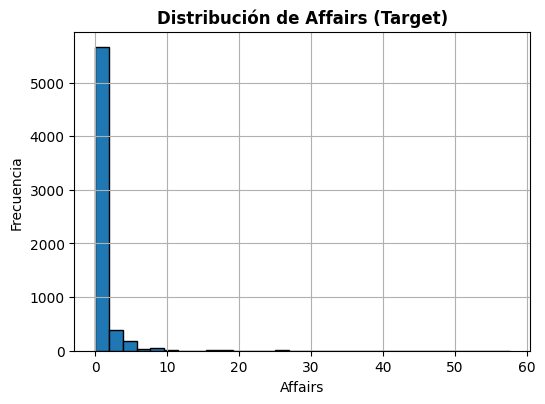

In [17]:
import matplotlib.pyplot as plt

print("\n" + "="*70)
print("1.3 VISUALIZACIÓN DE ATRIBUTOS")
print("="*70)
print("\nGenerando gráficos...")

# Crear figura con múltiples subplots
fig = plt.figure(figsize=(20, 24))

# 1. Distribución de Affairs (Target)
plt.subplot(5, 3, 1)
data['affairs'].hist(bins=30, edgecolor='black')
plt.title('Distribución de Affairs (Target)', fontsize=12, fontweight='bold')
plt.xlabel('Affairs')
plt.ylabel('Frecuencia')

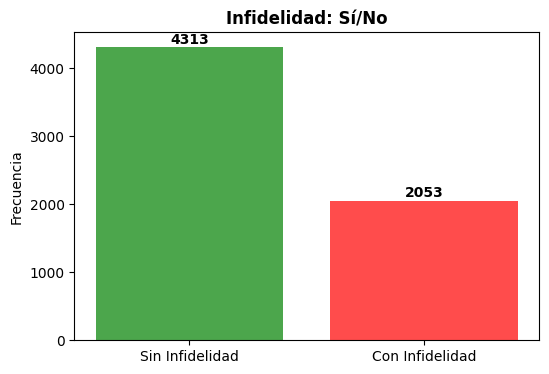

In [34]:
# 2. Affairs: Con/Sin infidelidad
plt.figure(figsize=(6,4))
affairs_binary = (data['affairs'] > 0).value_counts()
plt.bar(['Sin Infidelidad', 'Con Infidelidad'], affairs_binary.values, color=['green', 'red'], alpha=0.7)
plt.title('Infidelidad: Sí/No', fontsize=12, fontweight='bold')
plt.ylabel('Frecuencia')
for i, v in enumerate(affairs_binary.values):
    plt.text(i, v + 50, str(v), ha='center', fontweight='bold')
plt.show()

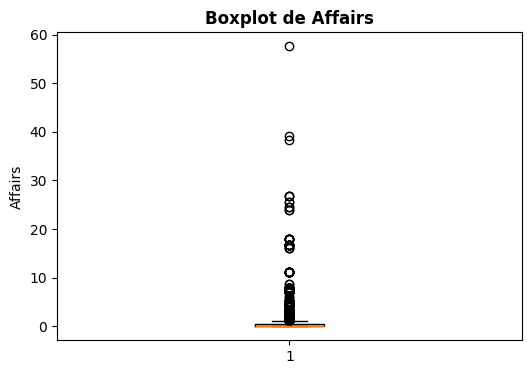

In [33]:
# 3. Boxplot de Affairs
plt.figure(figsize=(6,4))
plt.boxplot(data['affairs'], vert=True)
plt.title('Boxplot de Affairs', fontsize=12, fontweight='bold')
plt.ylabel('Affairs')
plt.show()

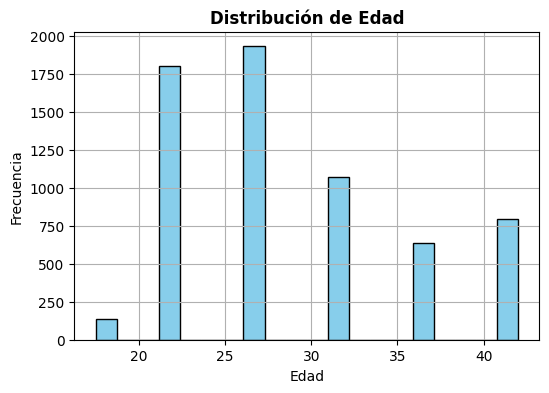

In [35]:
# 4. Distribución de Edad
plt.figure(figsize=(6,4))
data['age'].hist(bins=20, edgecolor='black', color='skyblue')
plt.title('Distribución de Edad', fontsize=12, fontweight='bold')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

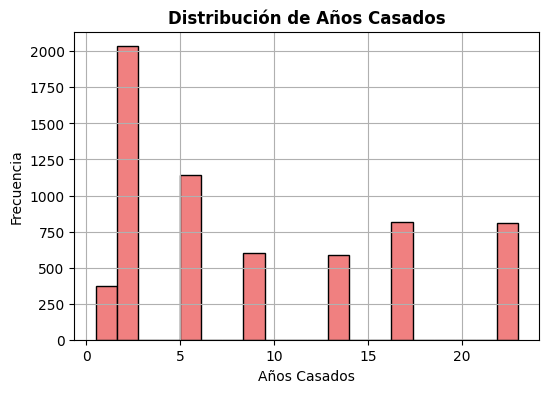

In [36]:
# 5. Distribución de Años Casados
plt.figure(figsize=(6,4))
data['yrs_married'].hist(bins=20, edgecolor='black', color='lightcoral')
plt.title('Distribución de Años Casados', fontsize=12, fontweight='bold')
plt.xlabel('Años Casados')
plt.ylabel('Frecuencia')
plt.show()

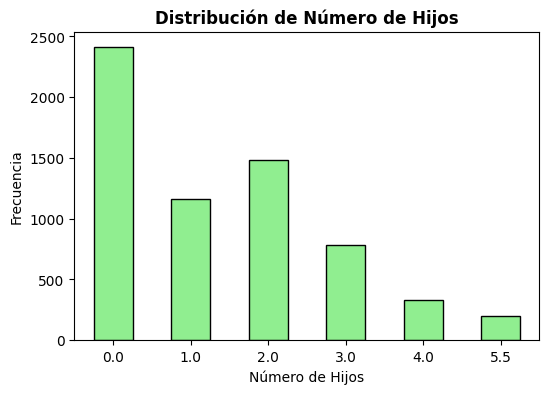

In [37]:
# 6. Distribución de Número de Hijos
plt.figure(figsize=(6,4))
data['children'].value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribución de Número de Hijos', fontsize=12, fontweight='bold')
plt.xlabel('Número de Hijos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

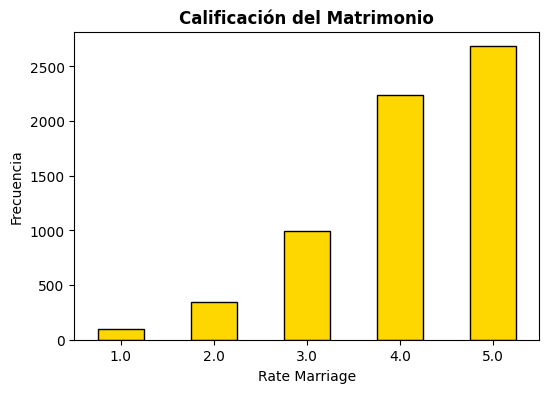

In [38]:
# 7. Calificación del Matrimonio
plt.figure(figsize=(6,4))
data['rate_marriage'].value_counts().sort_index().plot(kind='bar', color='gold', edgecolor='black')
plt.title('Calificación del Matrimonio', fontsize=12, fontweight='bold')
plt.xlabel('Rate Marriage')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

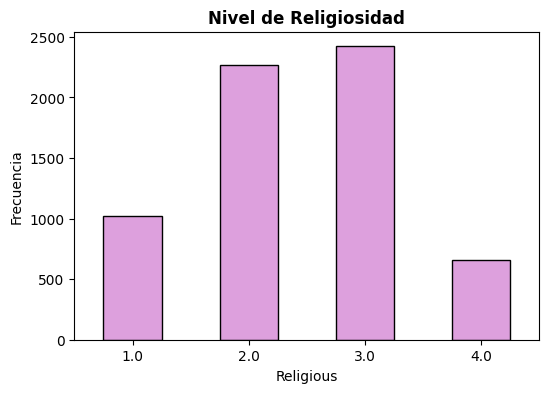

In [39]:
# 8. Nivel de Religiosidad
plt.figure(figsize=(6,4))
data['religious'].value_counts().sort_index().plot(kind='bar', color='plum', edgecolor='black')
plt.title('Nivel de Religiosidad', fontsize=12, fontweight='bold')
plt.xlabel('Religious')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

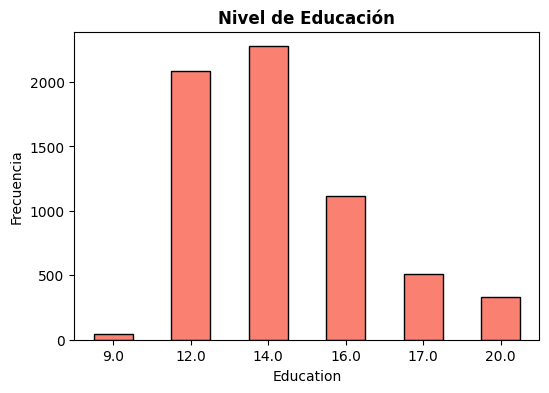

In [40]:
# 9. Nivel de Educación
plt.figure(figsize=(6,4))
data['educ'].value_counts().sort_index().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Nivel de Educación', fontsize=12, fontweight='bold')
plt.xlabel('Education')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

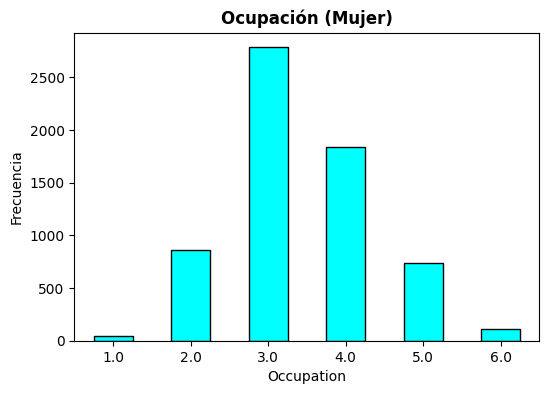

In [41]:
# 10. Ocupación (Mujer)
plt.figure(figsize=(6,4))
data['occupation'].value_counts().sort_index().plot(kind='bar', color='cyan', edgecolor='black')
plt.title('Ocupación (Mujer)', fontsize=12, fontweight='bold')
plt.xlabel('Occupation')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

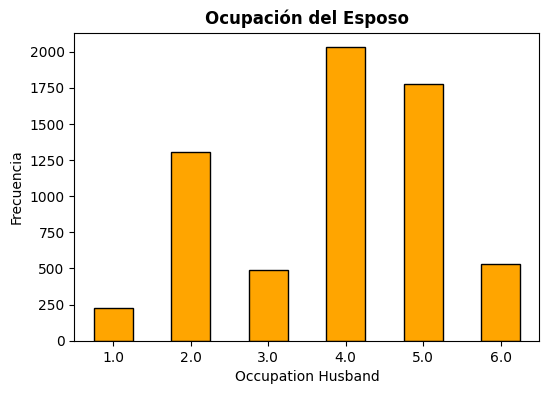

In [42]:
# 11. Ocupación del Esposo
plt.figure(figsize=(6,4))
data['occupation_husb'].value_counts().sort_index().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Ocupación del Esposo', fontsize=12, fontweight='bold')
plt.xlabel('Occupation Husband')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

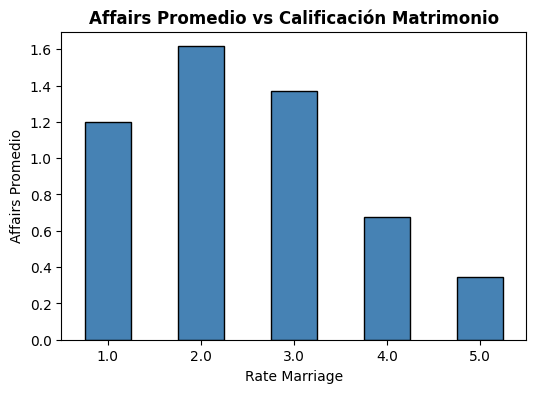

In [43]:
# 12. Affairs Promedio vs Calificación Matrimonio
plt.figure(figsize=(6,4))
data.groupby('rate_marriage')['affairs'].mean().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Affairs Promedio vs Calificación Matrimonio', fontsize=12, fontweight='bold')
plt.xlabel('Rate Marriage')
plt.ylabel('Affairs Promedio')
plt.xticks(rotation=0)
plt.show()

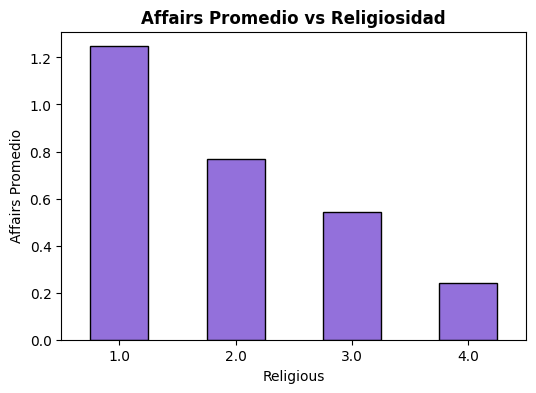

In [44]:
# 13. Affairs Promedio vs Religiosidad
plt.figure(figsize=(6,4))
data.groupby('religious')['affairs'].mean().plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title('Affairs Promedio vs Religiosidad', fontsize=12, fontweight='bold')
plt.xlabel('Religious')
plt.ylabel('Affairs Promedio')
plt.xticks(rotation=0)
plt.show()

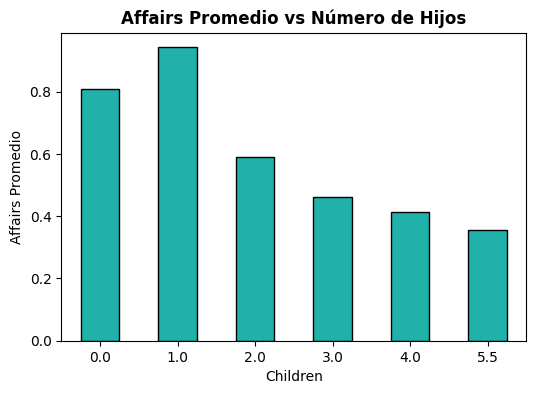

In [45]:
# 14. Affairs Promedio vs Número de Hijos
plt.figure(figsize=(6,4))
data.groupby('children')['affairs'].mean().plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.title('Affairs Promedio vs Número de Hijos', fontsize=12, fontweight='bold')
plt.xlabel('Children')
plt.ylabel('Affairs Promedio')
plt.xticks(rotation=0)
plt.show()

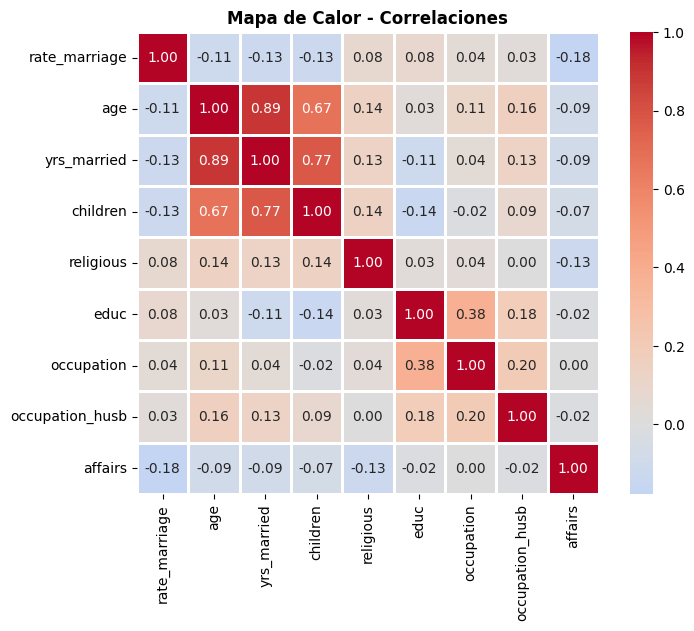

In [46]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Mapa de Calor - Correlaciones', fontsize=12, fontweight='bold')
plt.show()

## <font color=blue>2. Preprocesamiento de los datos</font>

### **Verificar datos faltantes y/o duplicados**

In [48]:
# Información general del dataset
print("\n--- INFORMACIÓN GENERAL DEL DATASET ---")
print(f"Dimensiones: {data.shape[0]} filas x {data.shape[1]} columnas")
print(f"Columnas: {list(data.columns)}")

# Verificar datos faltantes
print("\n--- DATOS FALTANTES ---")
print(f"\nTotal de valores nulos por columna:")
valores_nulos = data.isnull().sum()
print(valores_nulos)


--- INFORMACIÓN GENERAL DEL DATASET ---
Dimensiones: 6366 filas x 9 columnas
Columnas: ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb', 'affairs']

--- DATOS FALTANTES ---

Total de valores nulos por columna:
rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64


In [49]:
print(f"\nPorcentaje de valores nulos por columna:")
porcentaje_nulos = (data.isnull().sum() / len(data)) * 100
print(porcentaje_nulos)


Porcentaje de valores nulos por columna:
rate_marriage      0.0
age                0.0
yrs_married        0.0
children           0.0
religious          0.0
educ               0.0
occupation         0.0
occupation_husb    0.0
affairs            0.0
dtype: float64


In [50]:
total_nulos = data.isnull().sum().sum()
print(f"\nTotal de valores nulos en el dataset: {total_nulos}")

if total_nulos == 0:
    print("✓ NO hay valores faltantes en el dataset")
else:
    print(f"✗ Se encontraron {total_nulos} valores faltantes")


Total de valores nulos en el dataset: 0
✓ NO hay valores faltantes en el dataset


In [54]:
# Verificar duplicados
print("\n--- DUPLICADOS ---")
duplicados = data.duplicated().sum()
print(f"Total de filas duplicadas: {duplicados}")

if duplicados > 0:
    print(f"✗ Se encontraron {duplicados} filas duplicadas")
    print("\nEjemplos de filas duplicadas:")
    print(data[data.duplicated(keep=False)].head(10))
    
    # Eliminar duplicados
    df_sin_duplicados = data.drop_duplicates()
    print(f"\nFilas después de eliminar duplicados: {len(df_sin_duplicados)}")
    data_sin_dup = df_sin_duplicados
else:
    print("✓ NO hay filas duplicadas en el dataset")


--- DUPLICADOS ---
Total de filas duplicadas: 1039
✗ Se encontraron 1039 filas duplicadas

Ejemplos de filas duplicadas:
     rate_marriage   age  yrs_married  children  religious  educ  occupation  \
2              4.0  22.0          2.5       0.0        1.0  16.0         3.0   
35             3.0  27.0          9.0       2.0        2.0  12.0         5.0   
39             4.0  22.0          2.5       1.0        2.0  14.0         3.0   
113            3.0  27.0          9.0       2.0        2.0  12.0         3.0   
137            5.0  27.0          2.5       0.0        2.0  14.0         3.0   
145            5.0  27.0          6.0       0.0        3.0  14.0         3.0   
163            3.0  22.0          2.5       0.0        2.0  12.0         3.0   
164            4.0  32.0         13.0       2.0        2.0  14.0         3.0   
175            3.0  27.0          9.0       2.0        2.0  12.0         5.0   
279            4.0  27.0         13.0       2.0        2.0  12.0         3.0  

In [55]:
# Verificar duplicados por combinación de características
print("\n--- VERIFICACIÓN ADICIONAL ---")
print("Verificando posibles duplicados en subconjuntos de variables...")

# Duplicados considerando solo variables predictoras (sin affairs)
predictoras = ['rate_marriage', 'age', 'yrs_married', 'children', 
               'religious', 'educ', 'occupation', 'occupation_husb']
duplicados_predictoras = data_sin_dup[predictoras].duplicated().sum()
print(f"Filas con mismas variables predictoras: {duplicados_predictoras}")


--- VERIFICACIÓN ADICIONAL ---
Verificando posibles duplicados en subconjuntos de variables...
Filas con mismas variables predictoras: 498


In [56]:
# Resumen final de limpieza
print("\n--- RESUMEN DE VERIFICACIÓN ---")
print(f"Filas originales: {data.shape[0]}")
print(f"Columnas: {data.shape[1]}")
print(f"Valores nulos: {total_nulos}")
print(f"Duplicados eliminados: {duplicados}")
print(f"Filas finales: {len(data_sin_dup)}")


--- RESUMEN DE VERIFICACIÓN ---
Filas originales: 6366
Columnas: 9
Valores nulos: 0
Duplicados eliminados: 1039
Filas finales: 5327


### **Separar variables predictoras y el atributo destino de los datos**

In [57]:
# Definir variables predictoras (X) y variable objetivo (y)
X = data_sin_dup[['rate_marriage', 'age', 'yrs_married', 'children', 
        'religious', 'educ', 'occupation', 'occupation_husb']]

y = data_sin_dup['affairs']

print("\n--- VARIABLES PREDICTORAS (X) ---")
print(f"Dimensiones: {X.shape[0]} filas x {X.shape[1]} columnas")
print(f"Columnas: {list(X.columns)}")
print("\nPrimeras 5 filas:")
print(X.head())

print("\n--- ESTADÍSTICAS DE VARIABLES PREDICTORAS ---")
print(X.describe())


--- VARIABLES PREDICTORAS (X) ---
Dimensiones: 5327 filas x 8 columnas
Columnas: ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb']

Primeras 5 filas:
   rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb  
0              5.0  
1              4.0  
2              5.0  
3              5.0  
4              4.0  

--- ESTADÍSTICAS DE VARIABLES PREDICTORAS ---
       rate_marriage          age  yrs_married     children    religious  \
count    5327.000000  5327.000000  5327.000000  5327.000000  5327.000000   

In [58]:
print("\n--- VARIABLE OBJETIVO (y) ---")
print(f"Dimensiones: {y.shape[0]} valores")
print(f"Nombre: affairs")
print("\nPrimeros 5 valores:")
print(y.head())


--- VARIABLE OBJETIVO (y) ---
Dimensiones: 5327 valores
Nombre: affairs

Primeros 5 valores:
0    0.111111
1    3.230769
2    1.400000
3    0.727273
4    4.666666
Name: affairs, dtype: float64


In [59]:
print("\n--- ESTADÍSTICAS DE VARIABLE OBJETIVO ---")
print(f"Media: {y.mean():.4f}")
print(f"Mediana: {y.median():.4f}")
print(f"Desviación estándar: {y.std():.4f}")
print(f"Mínimo: {y.min():.4f}")
print(f"Máximo: {y.max():.4f}")


--- ESTADÍSTICAS DE VARIABLE OBJETIVO ---
Media: 0.8352
Mediana: 0.0000
Desviación estándar: 2.3834
Mínimo: 0.0000
Máximo: 57.6000


In [60]:
print("\n--- DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ---")
print(f"\nPersonas sin infidelidad (affairs = 0): {(y == 0).sum()} ({(y == 0).sum()/len(y)*100:.2f}%)")
print(f"Personas con infidelidad (affairs > 0): {(y > 0).sum()} ({(y > 0).sum()/len(y)*100:.2f}%)")


--- DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ---

Personas sin infidelidad (affairs = 0): 3305 (62.04%)
Personas con infidelidad (affairs > 0): 2022 (37.96%)


In [61]:
print("\n--- DISTRIBUCIÓN DETALLADA ---")
print(y.value_counts().sort_index())


--- DISTRIBUCIÓN DETALLADA ---
affairs
0.000000     3305
0.043478       22
0.060606       22
0.076923       24
0.111111       28
             ... 
25.599991       2
26.879990       3
38.399994       1
39.199982       1
57.599991       1
Name: count, Length: 77, dtype: int64


In [62]:
# Guardar datos procesados
print("\n--- GUARDANDO DATOS ---")
data_sin_dup.to_csv('infiel_procesado.csv', index=False)
print("✓ Dataset completo guardado en: infiel_procesado.csv")


--- GUARDANDO DATOS ---
✓ Dataset completo guardado en: infiel_procesado.csv


In [63]:
X.to_csv('X_predictoras.csv', index=False)
print("✓ Variables predictoras guardadas en: X_predictoras.csv")

y.to_csv('y_target.csv', index=False, header=True)
print("✓ Variable objetivo guardada en: y_target.csv")

✓ Variables predictoras guardadas en: X_predictoras.csv
✓ Variable objetivo guardada en: y_target.csv


In [64]:
# Crear dataset con variable objetivo binaria (opcional)
y_binary = (y > 0).astype(int)
print("\n--- VARIABLE OBJETIVO BINARIA (OPCIONAL) ---")
print(f"0 (sin infidelidad): {(y_binary == 0).sum()}")
print(f"1 (con infidelidad): {(y_binary == 1).sum()}")
y_binary.to_csv('y_target_binary.csv', index=False, header=True)
print("✓ Variable objetivo binaria guardada en: y_target_binary.csv")


--- VARIABLE OBJETIVO BINARIA (OPCIONAL) ---
0 (sin infidelidad): 3305
1 (con infidelidad): 2022
✓ Variable objetivo binaria guardada en: y_target_binary.csv


## <font color=blue>3. Entrenando los modelos SVM </font>

### **Dividir el conjunto de datos en una proporción de 80: 20**

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Preparar datos
X = data_sin_dup[['rate_marriage', 'age', 'yrs_married', 'children', 
        'religious', 'educ', 'occupation', 'occupation_husb']]
y = (data_sin_dup['affairs'] > 0).astype(int)  # Convertir a binario: 0=sin infidelidad, 1=con infidelidad

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nConjunto de ENTRENAMIENTO:")
print(f"  Filas: {len(X_train)}")
print(f"  Sin infidelidad (0): {(y_train == 0).sum()} ({(y_train == 0).sum()/len(y_train)*100:.2f}%)")
print(f"  Con infidelidad (1): {(y_train == 1).sum()} ({(y_train == 1).sum()/len(y_train)*100:.2f}%)")

print(f"\nConjunto de PRUEBA:")
print(f"  Filas: {len(X_test)}")
print(f"  Sin infidelidad (0): {(y_test == 0).sum()} ({(y_test == 0).sum()/len(y_test)*100:.2f}%)")
print(f"  Con infidelidad (1): {(y_test == 1).sum()} ({(y_test == 1).sum()/len(y_test)*100:.2f}%)")


Conjunto de ENTRENAMIENTO:
  Filas: 4261
  Sin infidelidad (0): 2644 (62.05%)
  Con infidelidad (1): 1617 (37.95%)

Conjunto de PRUEBA:
  Filas: 1066
  Sin infidelidad (0): 661 (62.01%)
  Con infidelidad (1): 405 (37.99%)


In [68]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Datos escalados con StandardScaler")


✓ Datos escalados con StandardScaler


### **Modelo #1: Clasificador SVM basico (sin parametros)**



In [70]:
# Modelo #1: Clasificador SVM basico (sin parametros)
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Entrenar modelo básico
modelo1 = SVC(random_state=42)
modelo1.fit(X_train_scaled, y_train)

# Predicciones
y_pred1 = modelo1.predict(X_test_scaled)

# Evaluación
print("\n--- RESULTADOS DEL MODELO 1 ---")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred1):.4f}")

print("\nMatriz de Confusión:")
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred1, target_names=['Sin Infidelidad', 'Con Infidelidad']))


--- RESULTADOS DEL MODELO 1 ---

Accuracy: 0.6660

Matriz de Confusión:
[[563  98]
 [258 147]]

Reporte de Clasificación:
                 precision    recall  f1-score   support

Sin Infidelidad       0.69      0.85      0.76       661
Con Infidelidad       0.60      0.36      0.45       405

       accuracy                           0.67      1066
      macro avg       0.64      0.61      0.61      1066
   weighted avg       0.65      0.67      0.64      1066



### **Modelo #2: Clasificador SVM con hiperparametros**

In [78]:
print("\nBuscando mejores hiperparámetros con GridSearchCV...")

# Definir grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

# Grid Search
grid_search = GridSearchCV(
    SVC(random_state=42), 
    param_grid, 
    cv=5, 
    n_jobs=-1, 
    scoring='accuracy', 
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"\n✓ Grid Search completado")
print(f"\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print(f"\nMejor score CV: {grid_search.best_score_:.4f}")


Buscando mejores hiperparámetros con GridSearchCV...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

✓ Grid Search completado

Mejores hiperparámetros encontrados:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Mejor score CV: 0.6813


In [79]:
# Modelo con mejores parámetros
modelo2 = grid_search.best_estimator_

# Predicciones
y_pred2 = modelo2.predict(X_test_scaled)

# Evaluación
print("\n--- RESULTADOS DEL MODELO 2 ---")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred2):.4f}")

print("\nMatriz de Confusión:")
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred2, target_names=['Sin Infidelidad', 'Con Infidelidad']))


--- RESULTADOS DEL MODELO 2 ---

Accuracy: 0.6670

Matriz de Confusión:
[[568  93]
 [262 143]]

Reporte de Clasificación:
                 precision    recall  f1-score   support

Sin Infidelidad       0.68      0.86      0.76       661
Con Infidelidad       0.61      0.35      0.45       405

       accuracy                           0.67      1066
      macro avg       0.65      0.61      0.60      1066
   weighted avg       0.65      0.67      0.64      1066



### **Modelo #3: Clasificador SVM con hiperparametros | Data sintetica**

In [80]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear clases
print("\nAplicando SMOTE para generar datos sintéticos...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"\nDatos de entrenamiento DESPUÉS de SMOTE:")
print(f"  Total de filas: {len(y_train_smote)}")
print(f"  Sin infidelidad (0): {(y_train_smote == 0).sum()} ({(y_train_smote == 0).sum()/len(y_train_smote)*100:.2f}%)")
print(f"  Con infidelidad (1): {(y_train_smote == 1).sum()} ({(y_train_smote == 1).sum()/len(y_train_smote)*100:.2f}%)")


Aplicando SMOTE para generar datos sintéticos...

Datos de entrenamiento DESPUÉS de SMOTE:
  Total de filas: 5288
  Sin infidelidad (0): 2644 (50.00%)
  Con infidelidad (1): 2644 (50.00%)


In [81]:
# Entrenar modelo con datos sintéticos y mejores hiperparámetros
print("\nEntrenando modelo con datos balanceados...")
modelo3 = SVC(**grid_search.best_params_, random_state=42)
modelo3.fit(X_train_smote, y_train_smote)

# Predicciones
y_pred3 = modelo3.predict(X_test_scaled)

# Evaluación
print("\n--- RESULTADOS DEL MODELO 3 ---")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred3):.4f}")


Entrenando modelo con datos balanceados...

--- RESULTADOS DEL MODELO 3 ---

Accuracy: 0.6510


In [82]:
print("\nMatriz de Confusión:")
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred3, target_names=['Sin Infidelidad', 'Con Infidelidad']))


Matriz de Confusión:
[[442 219]
 [153 252]]

Reporte de Clasificación:
                 precision    recall  f1-score   support

Sin Infidelidad       0.74      0.67      0.70       661
Con Infidelidad       0.54      0.62      0.58       405

       accuracy                           0.65      1066
      macro avg       0.64      0.65      0.64      1066
   weighted avg       0.66      0.65      0.66      1066



## <font color=blue>4. Visualización de resultados de los modelos </font>
- Reporte de Clasificacion
- Matriz de Confusion
<br>

In [84]:
resultados = pd.DataFrame({
    'Modelo': ['Modelo 1 (Básico)', 'Modelo 2 (Hiperparámetros)', 'Modelo 3 (SMOTE)'],
    'Accuracy': [
        accuracy_score(y_test, y_pred1),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3)
    ]
})

print("\n", resultados)


                        Modelo  Accuracy
0           Modelo 1 (Básico)  0.666041
1  Modelo 2 (Hiperparámetros)  0.666979
2            Modelo 3 (SMOTE)  0.651032



Generando visualizaciones...


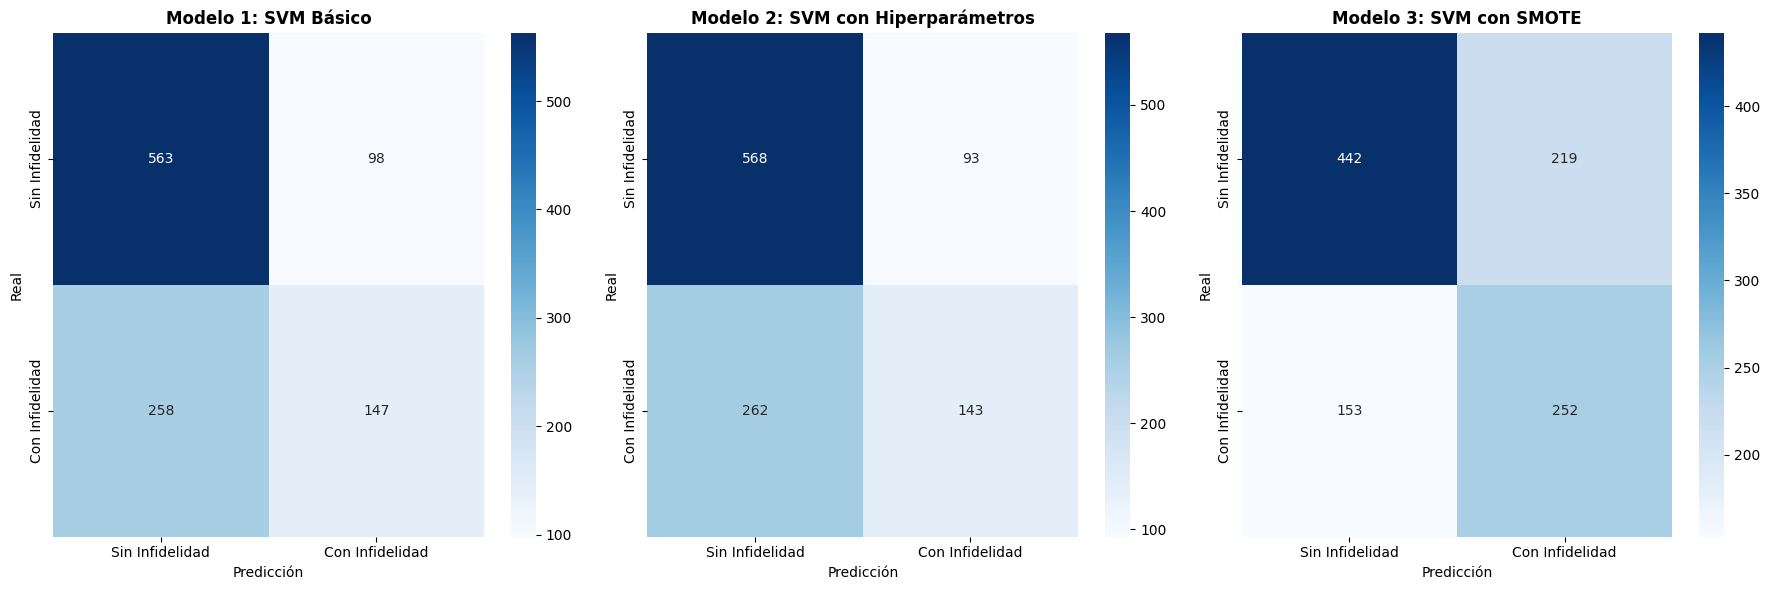

In [95]:
print("\nGenerando visualizaciones...")

# Crear figura con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Matrices de confusión
matrices = [cm1, cm2, cm3]
titulos = ['Modelo 1: SVM Básico', 'Modelo 2: SVM con Hiperparámetros', 'Modelo 3: SVM con SMOTE']

for i, (cm, titulo) in enumerate(zip(matrices, titulos)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Sin Infidelidad', 'Con Infidelidad'],
                yticklabels=['Sin Infidelidad', 'Con Infidelidad'])
    axes[i].set_title(titulo, fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Real')
    axes[i].set_xlabel('Predicción')

plt.tight_layout()
plt.show()


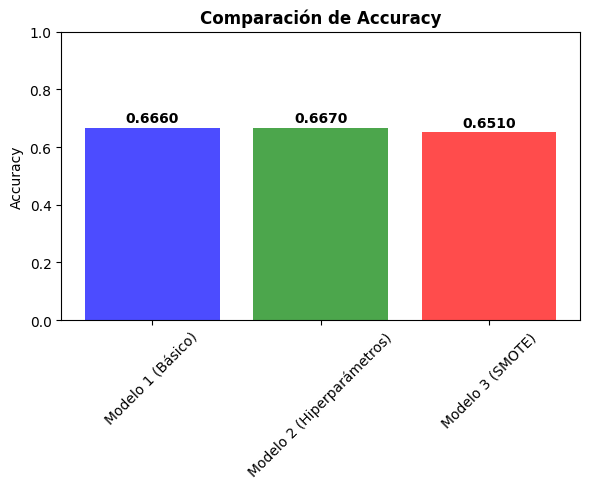

In [96]:
plt.figure(figsize=(6, 5))
plt.bar(resultados['Modelo'], resultados['Accuracy'],
        color=['blue', 'green', 'red'], alpha=0.7)
plt.title('Comparación de Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xticks(rotation=45)
for i, v in enumerate(resultados['Accuracy']):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


Generando visualizaciones...


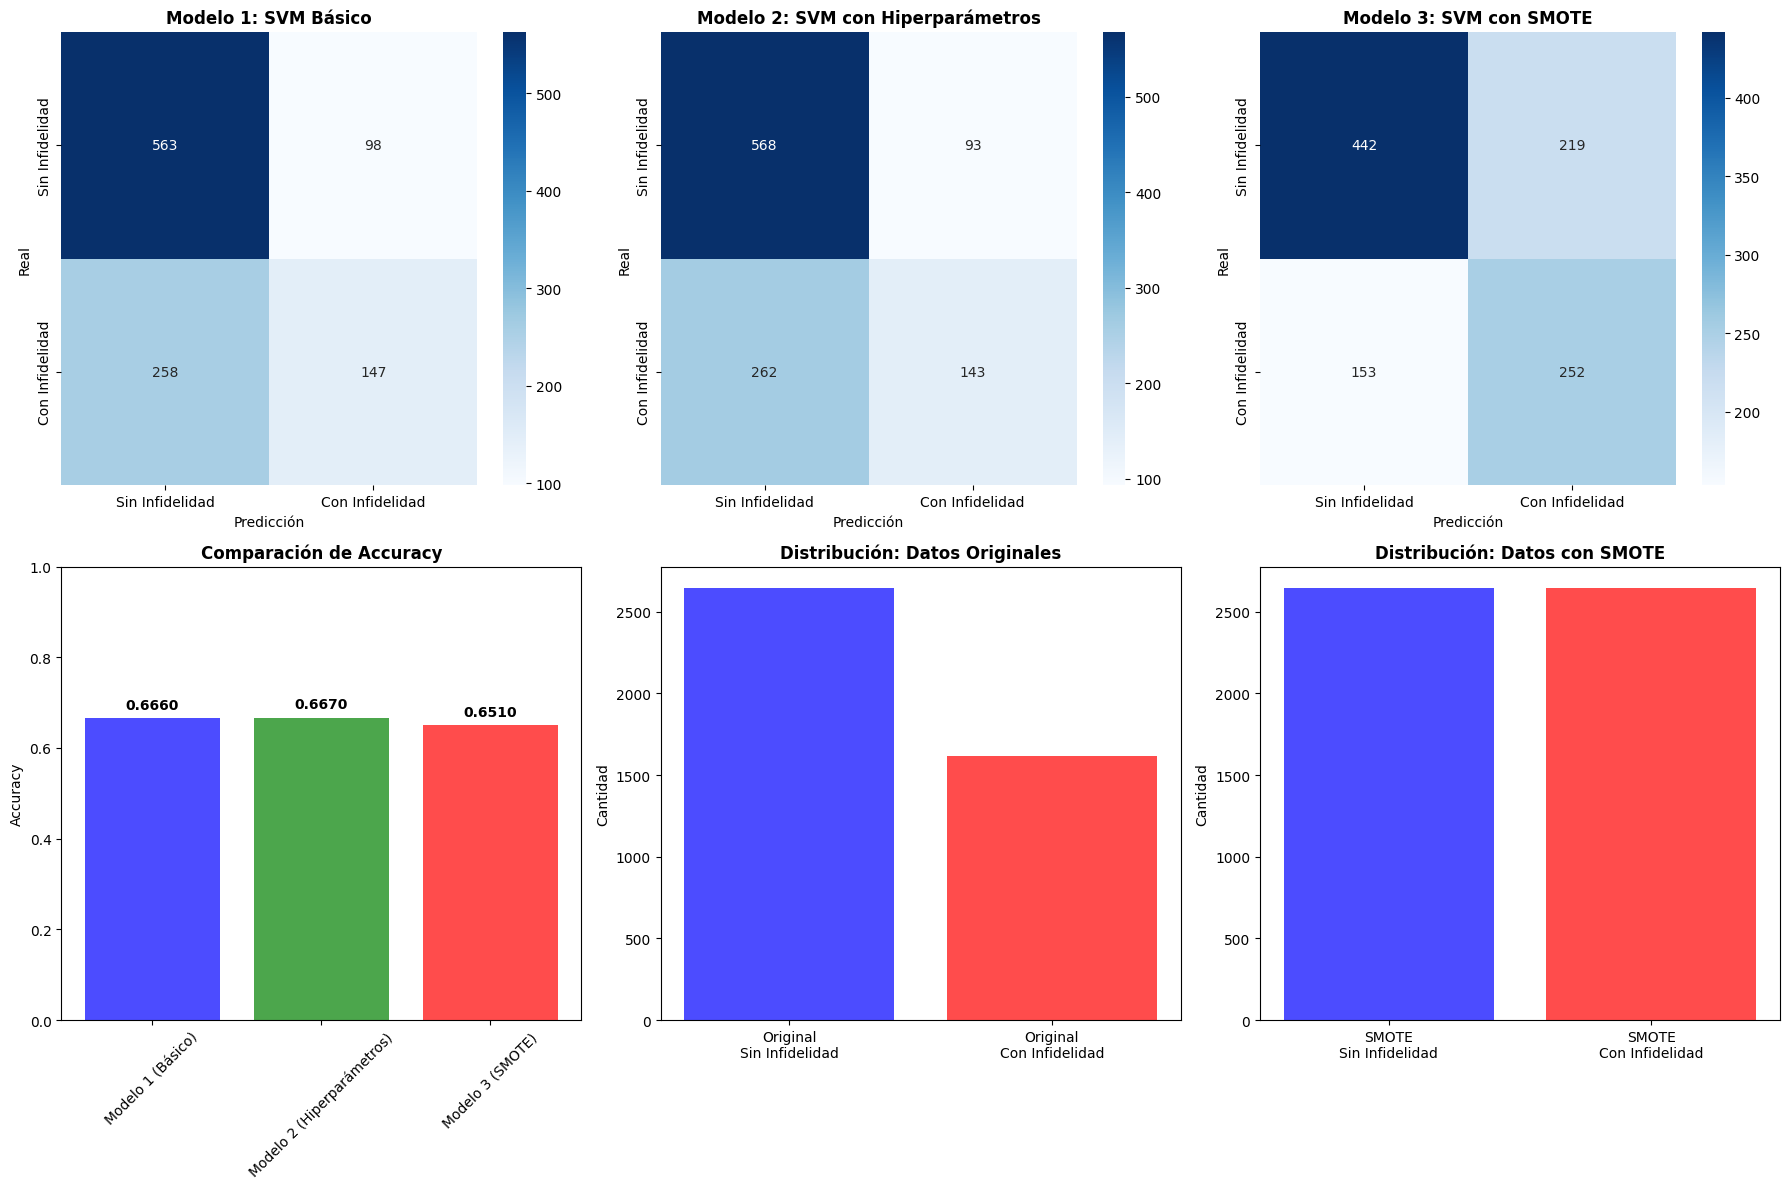


Gráficos guardados en: comparacion_modelos.png


In [97]:
print("\nGenerando visualizaciones...")

# Crear figura de 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# --- Arriba: Matrices de confusión ---
matrices = [cm1, cm2, cm3]
titulos = ['Modelo 1: SVM Básico', 'Modelo 2: SVM con Hiperparámetros', 'Modelo 3: SVM con SMOTE']

for i, (cm, titulo) in enumerate(zip(matrices, titulos)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, i],
                xticklabels=['Sin Infidelidad', 'Con Infidelidad'],
                yticklabels=['Sin Infidelidad', 'Con Infidelidad'])
    axes[0, i].set_title(titulo, fontsize=12, fontweight='bold')
    axes[0, i].set_ylabel('Real')
    axes[0, i].set_xlabel('Predicción')

# --- Abajo: Comparación de accuracy ---
axes[1, 0].bar(resultados['Modelo'], resultados['Accuracy'],
               color=['blue', 'green', 'red'], alpha=0.7)
axes[1, 0].set_title('Comparación de Accuracy', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_ylim([0, 1])
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(resultados['Accuracy']):
    axes[1, 0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

# --- Abajo: Distribución de clases original ---
axes[1, 1].bar(['Original\nSin Infidelidad', 'Original\nCon Infidelidad'], 
               [(y_train == 0).sum(), (y_train == 1).sum()],
               color=['blue', 'red'], alpha=0.7)
axes[1, 1].set_title('Distribución: Datos Originales', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Cantidad')

# --- Abajo: Distribución de clases con SMOTE ---
axes[1, 2].bar(['SMOTE\nSin Infidelidad', 'SMOTE\nCon Infidelidad'], 
               [(y_train_smote == 0).sum(), (y_train_smote == 1).sum()],
               color=['blue', 'red'], alpha=0.7)
axes[1, 2].set_title('Distribución: Datos con SMOTE', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Cantidad')

# Ajustar espacios
plt.tight_layout()

# Guardar y mostrar
plt.savefig('comparacion_modelos.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráficos guardados en: comparacion_modelos.png")


## <font color=blue>5. Evaluar el modelo</font>
- Explique sus conclusiones
<br>